# Geospatial Analysis

Practice some basic exploration of geospatial data.  Look for `<YOUR_TURN>` markers for edit the Python code.

In this practice, we will utilize the taxi-cab ride data.
Specifically, the two tables:
  * taxi zones
  * trips

```SQL
nyc-taxi-data=# \d taxi_zones
                                      Table "public.taxi_zones"
   Column   |            Type             |                        Modifiers                         
------------+-----------------------------+----------------------------------------------------------
 gid        | integer                     | not null default nextval('taxi_zones_gid_seq'::regclass)
 objectid   | integer                     | 
 shape_leng | numeric                     | 
 shape_area | numeric                     | 
 zone       | character varying(254)      | 
 locationid | smallint                    | 
 borough    | character varying(254)      | 
 geom       | geometry(MultiPolygon,4326) | 
Indexes:
    "taxi_zones_pkey" PRIMARY KEY, btree (gid)
    "index_taxi_zones_on_geom" gist (geom)
    "index_taxi_zones_on_locationid" btree (locationid)

nyc-taxi-data=# \d trips
                                           Table "public.trips"
        Column         |            Type             |                     Modifiers                      
-----------------------+-----------------------------+----------------------------------------------------
 id                    | integer                     | not null default nextval('trips_id_seq'::regclass)
 cab_type_id           | integer                     | 
 vendor_id             | character varying           | 
 pickup_datetime       | timestamp without time zone | 
 dropoff_datetime      | timestamp without time zone | 
 store_and_fwd_flag    | character(1)                | 
 rate_code_id          | integer                     | 
 pickup_longitude      | numeric                     | 
 pickup_latitude       | numeric                     | 
 dropoff_longitude     | numeric                     | 
 dropoff_latitude      | numeric                     | 
 passenger_count       | integer                     | 
 trip_distance         | numeric                     | 
 fare_amount           | numeric                     | 
 extra                 | numeric                     | 
 mta_tax               | numeric                     | 
 tip_amount            | numeric                     | 
 tolls_amount          | numeric                     | 
 ehail_fee             | numeric                     | 
 improvement_surcharge | numeric                     | 
 total_amount          | numeric                     | 
 payment_type          | character varying           | 
 trip_type             | integer                     | 
 pickup_nyct2010_gid   | integer                     | 
 dropoff_nyct2010_gid  | integer                     | 
 pickup                | geometry(Point,4326)        | 
 dropoff               | geometry(Point,4326)        | 
Indexes:
    "trips_pkey" PRIMARY KEY, btree (id)
```


In [ ]:
%load_ext sql

%%sql
SELECT t.pickup, z.geom, z.borough, count(*) "Count"
FROM public.trips t
JOIN public.taxi_zones z
 ON (t.pickup && z.geom)
WHERE ST_Intersects(t.pickup, z.geom)
GROUP BY t.pickup, z.geom, z.borough
LIMIT 100;
;

In [ ]:
con3 = psycopg2.connect(database="nyc-taxi-data", user="dsa_ro_user",password="readonly",host="dbase")

sql = " SELECT t.pickup, z.geom, z.borough, count(*) "
sql+= " FROM public.trips t "
sql+= " JOIN public.taxi_zones z "
sql+= " ON (z.geom && t.pickup) "
sql+= " WHERE ST_Intersects(z.geom, t.pickup) "
sql+= " GROUP BY t.pickup, z.geom, z.borough "

boroughs=gpd.GeoDataFrame.from_postgis(sql,con3,geom_col='geom')

# Edit this Line to pull 1000 taxi trips from the database
# ensure the 
sql= "SELECT * FROM public.trips LIMIT 1000"

pickups=gpd.GeoDataFrame.from_postgis(sql,con,geom_col='pickup' )

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import psycopg2

con = psycopg2.connect(database="nyc-taxi-data", user="dsa_ro_user",password="readonly",host="dbase")

# Pull the zone, borough and polygon of the taxi zone 
# from the taxi zones table.
sql= "SELECT zone, borough, geom FROM public.taxi_zones"

zones=gpd.GeoDataFrame.from_postgis(sql,con,geom_col='geom' )

# Edit this Line to pull 1000 taxi trips from the database
# ensure the 
sql= "SELECT * FROM public.trips LIMIT 1000"

pickups=gpd.GeoDataFrame.from_postgis(sql,con,geom_col='pickup' )

In [2]:
zones.describe()

,zone,borough,geom
count,263,263,263
unique,260,6,263
top,Governor's Island/Ellis Island/Liberty Island,Queens,(POLYGON ((-73.85465135700004 40.8338880269998...
freq,3,69,1


In [19]:
pickups.describe()

/usr/lib64/python3.4/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,id,cab_type_id,rate_code_id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,pickup_nyct2010_gid,dropoff_nyct2010_gid
count,1.000000e+03,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,999.000000,1000.000000
mean,8.521711e+08,1.0,1.010000,-73.968821,40.757411,-73.965183,40.765110,1.68800,2.874020,12.005500,0.318000,0.5,1.416990,0.154570,14.395060,1152.208208,36.347000
std,2.890572e+02,0.0,0.109142,0.033702,0.029515,0.015298,0.036733,1.34925,3.207584,9.041043,0.368798,0.0,2.173107,0.894856,10.810186,669.652059,26.636142
min,8.521706e+08,1.0,0.000000,-74.016408,40.641017,-74.030517,40.607530,1.00000,0.000000,2.500000,0.000000,0.5,0.000000,0.000000,3.000000,9.000000,20.000000
25%,8.521709e+08,1.0,1.000000,-73.986127,40.744700,-73.978764,40.762489,1.00000,1.000000,6.500000,0.000000,0.5,0.000000,0.000000,7.500000,NaN,23.000000
50%,8.521711e+08,1.0,1.000000,-73.973574,40.762883,-73.961982,40.775819,1.00000,1.800000,9.000000,0.000000,0.5,1.000000,0.000000,10.750000,NaN,29.000000
75%,8.521714e+08,1.0,1.000000,-73.960022,40.775820,-73.954173,40.780430,2.00000,3.500000,14.500000,0.500000,0.5,2.000000,0.000000,17.000000,NaN,34.000000
max,8.521716e+08,1.0,2.000000,-73.776667,40.834317,-73.928118,40.851346,6.00000,26.500000,73.000000,1.000000,0.5,30.000000,5.330000,88.200000,2158.000000,340.000000


## Plotting 

We can produce a geospatial (map) plot of the data.

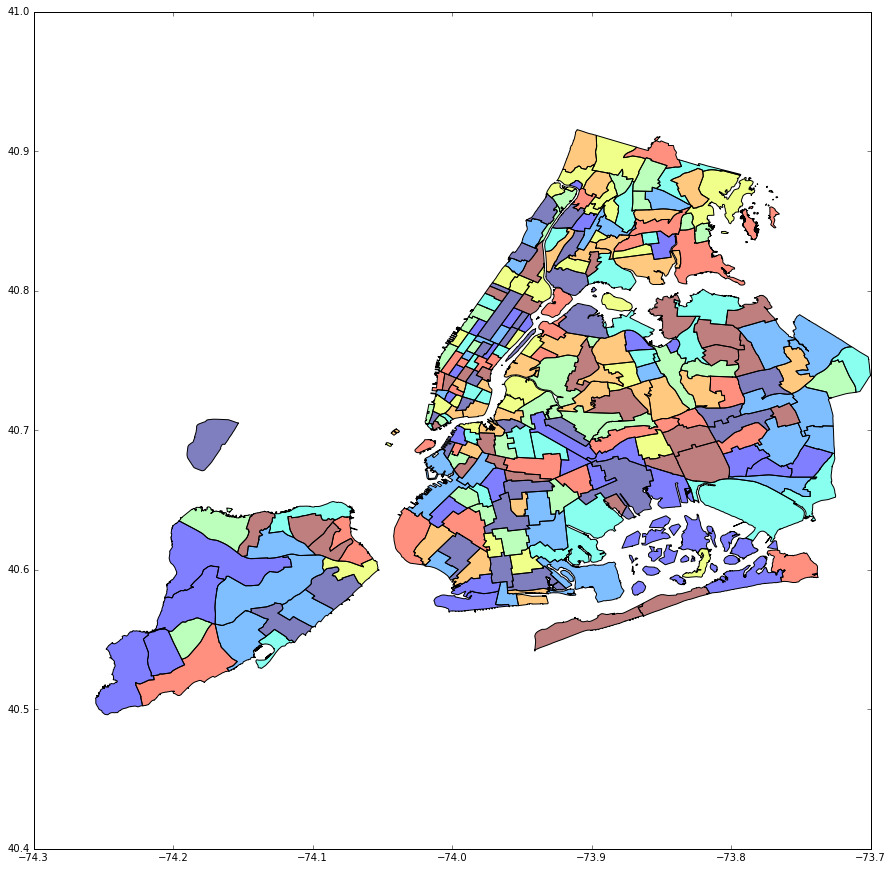

In [4]:
# plotting stuff
%matplotlib inline
zones.plot( figsize=(15,15))

Additionally, we can overlay additional inforamtion.

Instead of using scatter plot, use geopandas to overlay the taxi stops.

Read more about mapping data with GeoPandas here: http://geopandas.org/mapping.html

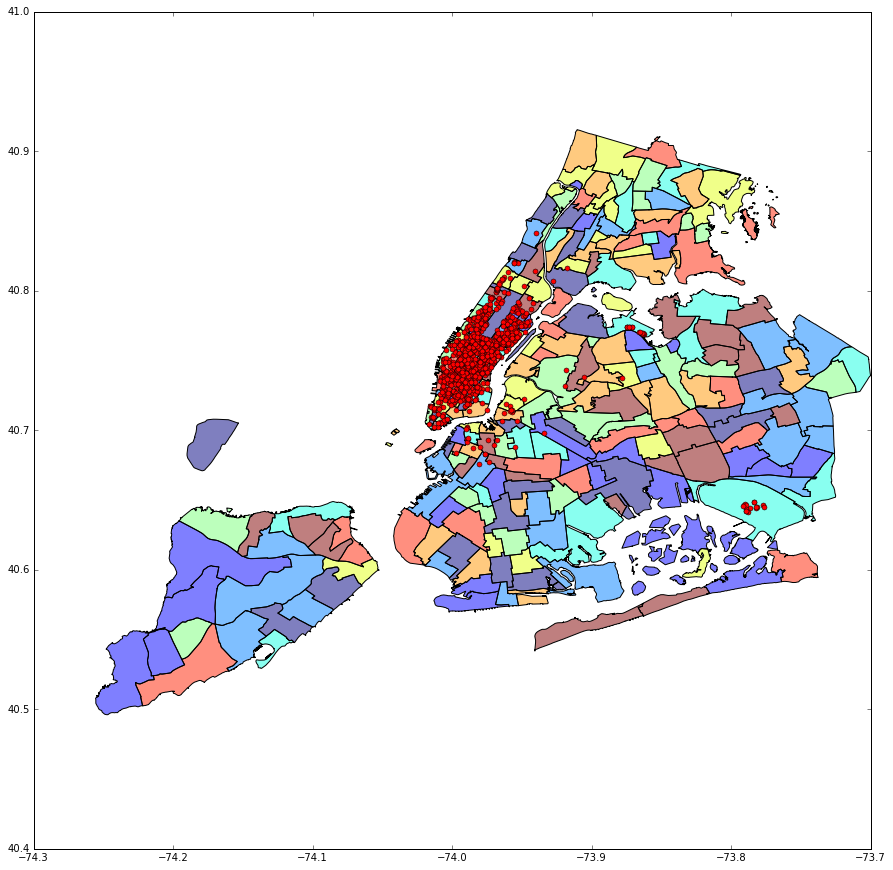

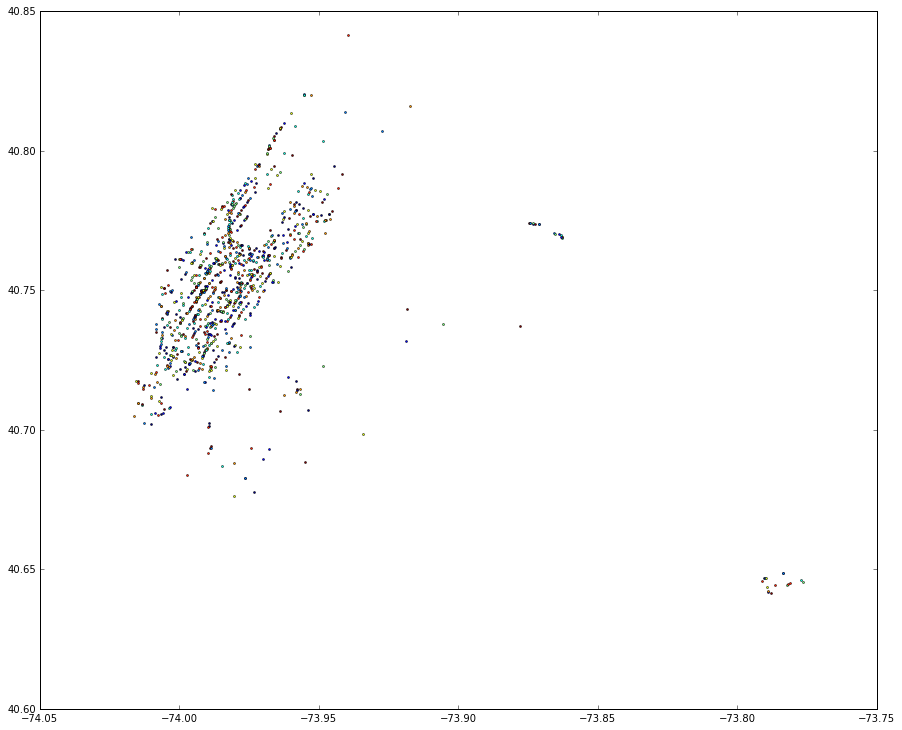

In [8]:
# Build a base map
base = zones.plot(figsize=(15,15))
pick = pickups.plot(figsize=(15,15))

# Then use the other data frame to plot points on the base map
pickups.plot(ax=base, marker='o', color='red', markersize=5);


## Plotting with Aggregation

In the next practice, pull the taxi zones from the database.
Show all the taxi zones in the first cell, then show the merged

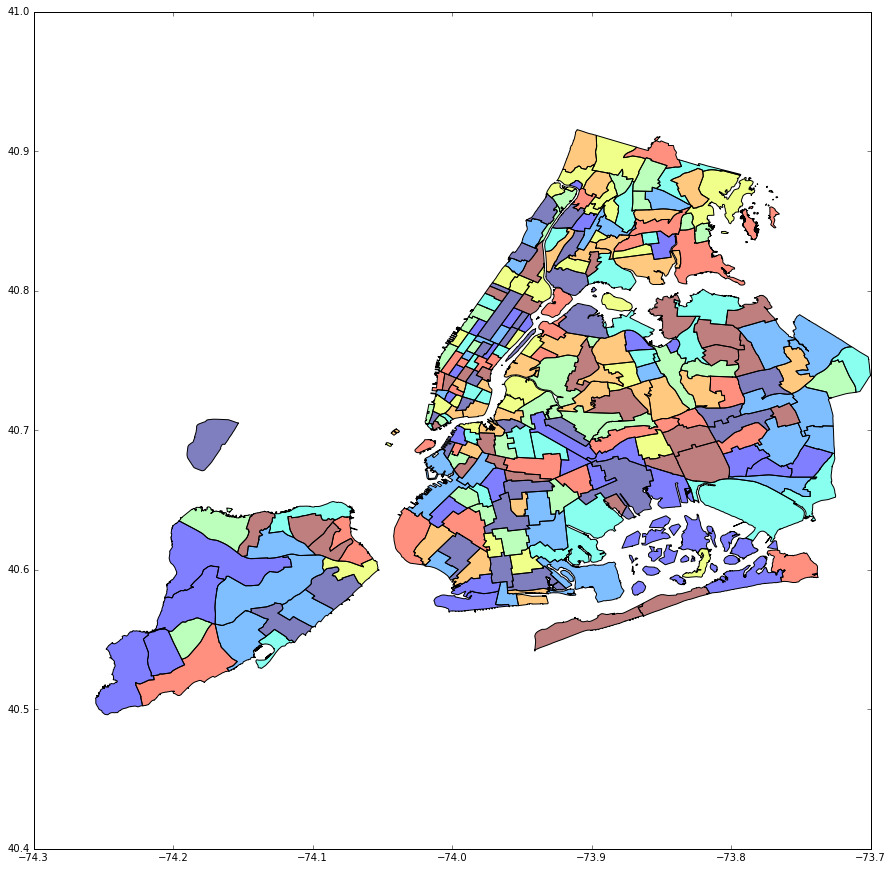

In [6]:
sql = "select borough, geom from taxi_zones"
zones = gpd.GeoDataFrame.from_postgis(sql,con,geom_col='geom' )
zones.plot(figsize=(15,15))

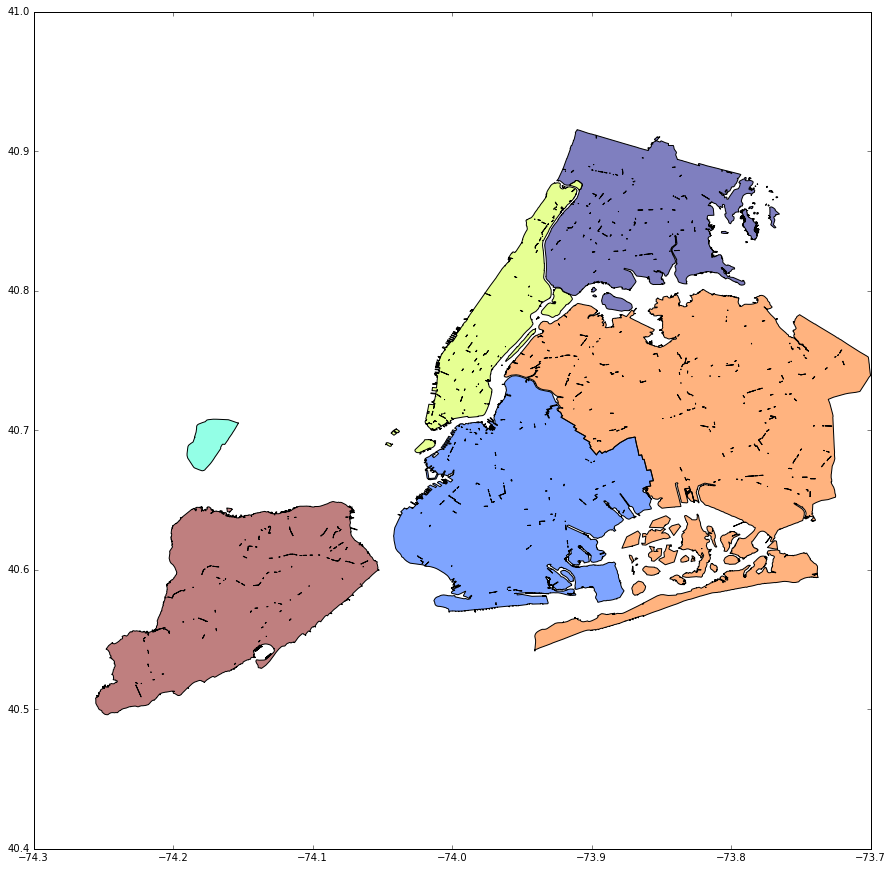

In [7]:
borrows = zones.dissolve(by=['borough'])

borrows.plot(figsize=(15,15));


In [ ]:
sql = "select borough, geom from taxi_zones"
zones = <YOUR_TURN>
zones.plot(figsize=(15,15))

In [ ]:
borrows = zones.dissolve(<YOUR_TURN>)

borrows.(<YOUR_TURN>)